In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/questions.csv')
df.head()

,Id,StateAbbr,QuestionUno,CategoryUno,Category,SubcategoryUno,Subcategory,AskedByClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline
0,1,NC,BB53B2A4-7C1B-45C3-9693-62047889317D,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,9C35423C-914A-42BC-8EBC-A370E76E2178,2019-06-19 22:10:06,NaN,NaN,NaN,2019-08-13 15:09:06,2019-07-08 00:00:00
1,2,NC,0C49F841-2782-4313-961E-7882B96D0854,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:34:36,NaN,NaN,NaN,2019-08-13 15:09:14,NaN
2,3,NC,BFC28E08-B6B1-4185-A91A-89DF90816BE4,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:57:18,FA34142B-1575-4720-981C-2D28C3560137,2019-06-22 02:37:16,FA34142B-1575-4720-981C-2D28C3560137,2019-06-24 19:02:35,NaN
3,4,NC,45B24109-243A-489B-B0D2-2F36C2A369FE,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,C9C3FA40-0D60-49B9-97F1-63AFEFAFA484,2019-06-20 02:33:14,FA34142B-1575-4720-981C-2D28C3560137,2019-07-27 18:04:08,FA34142B-1575-4720-981C-2D28C3560137,2019-07-31 05:49:18,NaN
4,5,NC,C4707F71-FE4A-4154-8174-AF00BEE2B361,F6016FBD-9501-4448-BCD3-BBB0E834E33B,Consumer Financial Questions,73FE486E-2B51-456A-A6D9-78A7D05802AA,"Bankruptcy, Debts & Purchases",ED7DEA10-CDB7-4A05-891D-889D1EA710BE,2019-06-20 17:04:47,NaN,NaN,NaN,2019-08-13 15:09:20,NaN


In [4]:
CA = df[df["StateAbbr"] == 'CA']
CA = CA.rename(columns = {"AskedOnUtc" : "datetime"})
CA["datetime"] = pd.to_datetime(CA["datetime"], format = '%Y-%m-%d %H:%M:%S')
CA["date"] = CA["datetime"].dt.date
CA["time"] = CA["datetime"].dt.time
CA.head()

,Id,StateAbbr,QuestionUno,CategoryUno,Category,SubcategoryUno,Subcategory,AskedByClientUno,datetime,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline,date,time
56288,56289,CA,6FC7A93A-43B2-4B7B-9039-4DA2EB5AFA01,588EFBC5-00FE-4415-B0F0-98B5A86C071B,Other,C699C6A8-B88F-4AA7-AD46-1BF5B1D1B77D,Wildfire or COVID-19: Personal Injury,8DE44491-7F68-4A9D-BFF8-B1C06902B72B,2020-09-01 21:56:34,2DB25CD5-5F3D-4316-9E3A-A2284C5AACCF,2020-09-04 20:46:30,NaN,2020-09-09 17:06:09,NaN,2020-09-01,21:56:34
56289,56290,CA,F56C321A-F27B-489C-B48D-64EC9A9266E0,FD678F86-62B1-4EC4-A628-98AEE7BC74D5,Consumer Financial Questions,5815798C-CC8D-4431-BBD4-B2EC899321B8,Wildfire or COVID-19: Debts & Purchases,F6B152BD-6485-4B31-AAB1-333C06C113F6,2020-09-01 22:13:32,E69588DA-4A00-4977-953F-D4D563821894,2020-09-15 01:34:05,NaN,2020-09-23 15:47:29,NaN,2020-09-01,22:13:32
56290,56291,CA,C9120472-674F-4E1F-AF2C-0B00C14DE5B2,69BAC219-3473-434A-AD14-1D162A8A8597,Housing and Homelessness,C50368A5-5370-441F-A36B-B143F5CE5CF4,Wildfire or COVID-19: Housing or Landlord/Tenant,38975E63-6962-417F-A450-FD82F0B2F068,2020-09-02 03:08:40,22746734-D076-4AC8-BA66-50426C01093C,2020-09-03 21:27:23,22746734-D076-4AC8-BA66-50426C01093C,2020-09-14 00:03:52,NaN,2020-09-02,03:08:40
56291,56292,CA,EC82F685-29A2-46B7-BD23-F6122A241B44,588EFBC5-00FE-4415-B0F0-98B5A86C071B,Other,8F18888E-957D-46C5-9814-A8F030D7DC6B,Wildfire or COVID-19: Other related issue,4F48E5EC-951B-4DA6-90BD-4B9B06D89DE5,2020-09-02 06:45:05,1C50F9C0-6417-4B0E-8F3B-AE823D232C4C,2020-09-10 21:27:46,1C50F9C0-6417-4B0E-8F3B-AE823D232C4C,2020-09-10 21:31:11,NaN,2020-09-02,06:45:05
56292,56293,CA,A75976B6-EEC5-4858-B2E4-B244706AAAE7,588EFBC5-00FE-4415-B0F0-98B5A86C071B,Other,8F18888E-957D-46C5-9814-A8F030D7DC6B,Wildfire or COVID-19: Other related issue,4DF52530-849F-4A12-810A-5B165677F6C6,2020-09-02 17:33:51,2DB25CD5-5F3D-4316-9E3A-A2284C5AACCF,2020-09-18 00:10:50,2DB25CD5-5F3D-4316-9E3A-A2284C5AACCF,2020-09-18 00:56:18,NaN,2020-09-02,17:33:51


In [5]:
ct = pd.crosstab(CA["date"], CA["Category"])
ct

Category,Consumer Financial Questions,Education,Family and Children,Health and Disability,Housing and Homelessness,Income Maintenance,Individual Rights,Other,"Work, Employment and Unemployment"
date,,,,,,,,,
2020-09-01,1,0,0,0,0,0,0,1,0
2020-09-02,0,0,1,0,1,0,0,2,0
2020-09-03,0,0,0,0,0,0,0,2,0
2020-09-04,0,0,1,0,0,0,0,2,0
2020-09-05,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
2022-01-21,0,0,1,0,1,0,0,4,2
2022-01-22,0,0,1,0,0,0,0,2,0
2022-01-23,1,0,0,0,1,1,0,1,0


In [6]:
moving_avg_df = pd.read_csv('MovingAvgFrequencybyCategory.csv')
moving_avg_df

,date,Consumer Financial Questions,Education,Family and Children,Health and Disability,Housing and Homelessness,Income Maintenance,Individual Rights,Other,"Work, Employment and Unemployment",All
0,2020-09-16,0.266667,0.0,0.733333,0.033333,0.400000,0.033333,0.0,1.300000,0.266667,3.033333
1,2020-09-17,0.233333,0.0,0.733333,0.066667,0.400000,0.033333,0.0,1.266667,0.266667,3.000000
2,2020-09-18,0.233333,0.0,0.733333,0.066667,0.400000,0.033333,0.0,1.233333,0.266667,2.966667
3,2020-09-19,0.300000,0.0,0.800000,0.066667,0.433333,0.033333,0.0,1.233333,0.266667,3.133333
4,2020-09-20,0.300000,0.0,0.800000,0.066667,0.466667,0.033333,0.0,1.233333,0.266667,3.166667
...,...,...,...,...,...,...,...,...,...,...,...
458,2022-01-07,0.133333,0.0,1.700000,0.066667,1.700000,0.033333,0.0,1.666667,0.300000,5.600000
459,2022-01-08,0.100000,0.0,1.666667,0.066667,1.666667,0.033333,0.0,1.700000,0.266667,5.500000
460,2022-01-09,0.133333,0.0,1.633333,0.066667,1.700000,0.066667,0.0,1.700000,0.266667,5.566667
461,2022-01-10,0.166667,0.0,1.666667,0.066667,1.766667,0.066667,0.0,1.866667,0.266667,5.866667


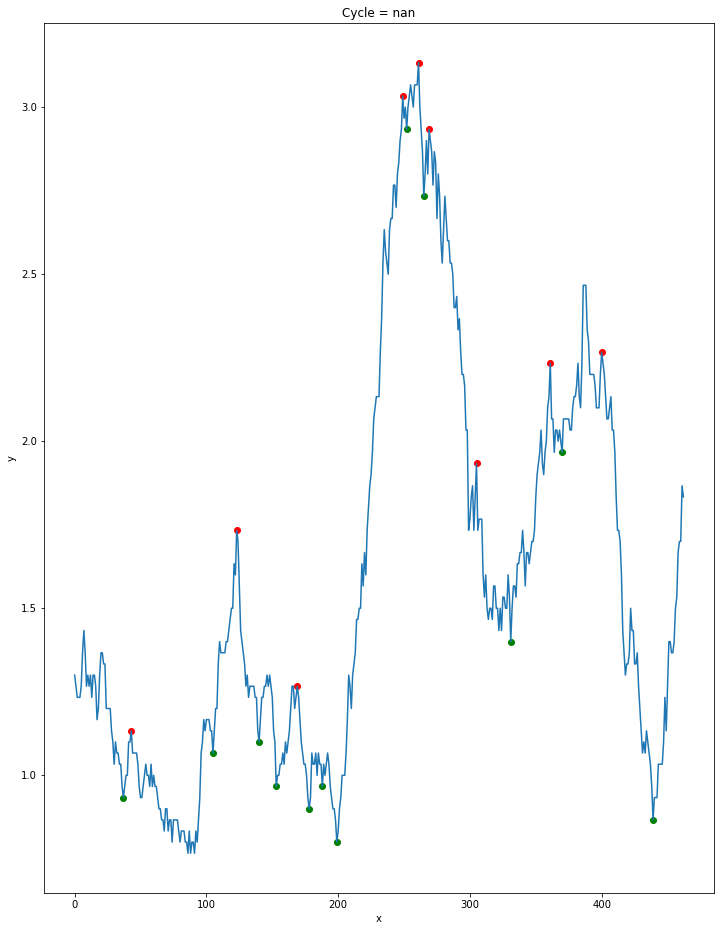

In [18]:
x = moving_avg_df.index
y = moving_avg_df["Other"]

# create a DataFrame with the data
df = pd.DataFrame({'x': x, 'y': y})

# find the high and low points of the plot
high_points = df.copy()
low_points = df.copy()

for i in range(2):
    high_points = high_points.loc[(high_points['y'].shift(1) < high_points['y']) & (high_points['y'].shift(-1) < high_points['y'])]
    low_points = low_points.loc[(low_points['y'].shift(1) > low_points['y']) & (low_points['y'].shift(-1) > low_points['y'])]

# calculate the cycle by taking the average distance between high and low points
cycle = np.mean(high_points['x'] - low_points['x'])

plt.figure(figsize=(12, 16))


# plot the data and highlight the high and low points
plt.plot(x, y)
plt.scatter(high_points['x'], high_points['y'], c='r')
plt.scatter(low_points['x'], low_points['y'], c='g')

# add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Cycle = {cycle:.2f}')

# display the plot
plt.show()